<a href="https://colab.research.google.com/github/Gabrinetio/Analise_Churn/blob/main/%22Balan%C3%A7a_Digital_via_Zootecnia%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criação da Fazenda Virtual 🐮

O que acontece aqui: Como não podemos pesar 5.000 bois de verdade agora, usamos o Python para criar uma simulação. Nós geramos medidas (peito e comprimento) e calculamos o peso usando fórmulas de zootecnia, adicionando um pouco de "erro" para simular a vida real (sujeira na balança, boi se mexendo, etc).

In [24]:
# --- PASSO 1: CRIAÇÃO DO CENÁRIO (A FAZENDA DIGITAL) ---

import pandas as pd  # Ferramenta para criar tabelas (como o Excel)
import numpy as np   # Ferramenta matemática para gerar números aleatórios
import seaborn as sns # Ferramenta para gráficos bonitos
import matplotlib.pyplot as plt # Ferramenta para plotar gráficos

# Configuração visual dos gráficos
sns.set(style='whitegrid')

print(">>> INICIANDO A SIMULAÇÃO DA FAZENDA <<<")
print("Gerando dados de 5.000 animais baseados na ciência...")

# Definimos quantos animais vamos criar
n_samples = 5000

# 1. CRIANDO AS MEDIDAS (SIMULAÇÃO)
# Geramos o tamanho do peito (Perímetro) com média de 190cm
# A função 'normal' cria uma curva onde a maioria está na média, mas existem magros e gordos
perimetro = np.random.normal(190, 15, n_samples)
perimetro = np.clip(perimetro, 140, 250) # Garante que não nasça nenhum boi mutante (muito pequeno ou gigante)

# Geramos o comprimento do corpo com média de 150cm
comprimento = np.random.normal(150, 10, n_samples)
comprimento = np.clip(comprimento, 120, 190)

# 2. CALCULANDO O PESO (A FÍSICA)
# Usamos uma fórmula real da zootecnia (Schaeffer) para descobrir o peso teórico
# Peso = (Peito ao quadrado * Comprimento) / Fator Genético
fator_genetico = np.random.uniform(10800, 11900, n_samples) # Variação natural da raça
peso_teorico = (perimetro**2 * comprimento) / fator_genetico

# Adicionamos o "Erro da Balança" (Ruído)
# Na vida real, a balança nunca é perfeita. Adicionamos +/- 15kg de erro aleatório.
erro_balanca = np.random.normal(0, 15, n_samples)
peso_final = peso_teorico + erro_balanca

# 3. ORGANIZANDO NA TABELA
# Criamos o DataFrame (a planilha do Excel dentro do Python)
df_completo = pd.DataFrame({
    'perimetro_toracico_cm': np.round(perimetro, 1),
    'comprimento_corporal_cm': np.round(comprimento, 1),
    'peso_kg': np.round(peso_final, 1)
})

print(f"Sucesso! {len(df_completo)} animais registrados no sistema.")
# Mostra as primeiras 5 linhas para conferir
df_completo.head()

>>> INICIANDO A SIMULAÇÃO DA FAZENDA <<<
Gerando dados de 5.000 animais baseados na ciência...
Sucesso! 5000 animais registrados no sistema.


,perimetro_toracico_cm,comprimento_corporal_cm,peso_kg
0,202.6,153.7,563.5
1,203.9,158.6,590.5
2,197.7,158.1,525.3
3,179.9,163.6,479.8
4,170.6,140.3,358.2


Análise Visual (A Prova Real) 📊

O que acontece aqui: Antes de ensinar a Inteligência Artificial, precisamos ver se os dados fazem sentido. Criamos um gráfico para confirmar se bois maiores realmente pesam mais. Se o gráfico for uma bagunça, a IA não vai aprender nada.

>>> ANALISANDO OS DADOS <<<
Observe o gráfico abaixo: Ele deve formar uma curva ascendente.
Isso confirma que quanto maior o animal, mais pesado ele é.


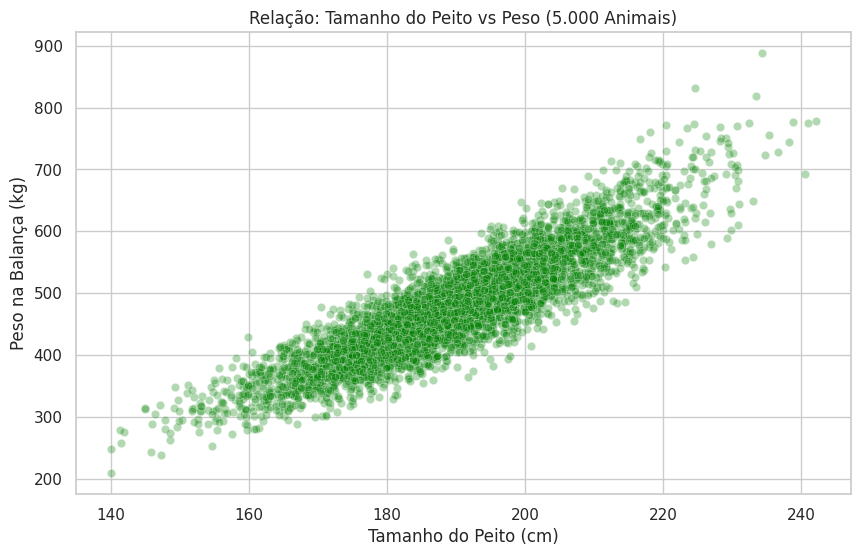

In [25]:
# --- PASSO 2: VISUALIZAÇÃO DOS DADOS ---

print(">>> ANALISANDO OS DADOS <<<")

# Criamos um gráfico de dispersão (pontinhos)
plt.figure(figsize=(10, 6))

# Eixo X = Tamanho do Peito, Eixo Y = Peso
sns.scatterplot(x='perimetro_toracico_cm', y='peso_kg', data=df_completo, alpha=0.3, color='green')

plt.title('Relação: Tamanho do Peito vs Peso (5.000 Animais)')
plt.xlabel('Tamanho do Peito (cm)')
plt.ylabel('Peso na Balança (kg)')

print("Observe o gráfico abaixo: Ele deve formar uma curva ascendente.")
print("Isso confirma que quanto maior o animal, mais pesado ele é.")
plt.show()

Treinando o "Cérebro" (Otimizado) 🧠

O que acontece aqui: É a parte mais complexa.

Dica para a IA: Criamos colunas extras (Volume e Área) para ajudar a IA a entender física.

Preparação: Separamos dados de estudo (Treino) e dados de prova (Teste).

Arquitetura: Criamos uma rede neural profunda (muitos neurônios).

Professores Inteligentes (Callbacks): Se a IA parar de aprender, o código diminui a velocidade ou para o treino automaticamente.

In [26]:
# --- PASSO 3: TREINAMENTO DA INTELIGÊNCIA ARTIFICIAL ---

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print(">>> PREPARANDO O CÉREBRO DA IA <<<")

# 1. ENGENHARIA DE DADOS (Dando dicas para a IA)
# A IA aprende mais rápido se dermos o volume aproximado, em vez de só as medidas cruas.
df_otimizado = df_completo.copy()
df_otimizado['interacao'] = df_otimizado['perimetro_toracico_cm'] * df_otimizado['comprimento_corporal_cm'] # Área
df_otimizado['volume_estimado'] = (df_otimizado['perimetro_toracico_cm'] ** 2) * df_otimizado['comprimento_corporal_cm'] # Volume

# Separamos: O que a IA vê (X) vs O que ela tem que adivinhar (y)
X = df_otimizado[['perimetro_toracico_cm', 'comprimento_corporal_cm', 'interacao', 'volume_estimado']].values
y = df_otimizado['peso_kg'].values

# 2. NORMALIZAÇÃO (A Régua)
# A IA trabalha melhor com números entre 0 e 1. Usamos o "Scaler" para traduzir.
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X) # Traduz as medidas para 0-1
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) # Traduz o peso para 0-1

# Dividimos: 80% para estudar (Treino), 20% para a prova final (Teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. CONSTRUINDO A REDE NEURAL (Arquitetura)
model = keras.Sequential([
    # Camada de Entrada: Recebe as 4 informações
    Dense(128, activation='relu', input_shape=(4,)),
    BatchNormalization(), # Estabiliza o aprendizado

    # Camadas Ocultas (Onde o raciocínio acontece)
    Dense(256, activation='relu'),
    Dropout(0.2), # "Esquece" 20% de propósito para não decorar (evita cola)

    Dense(128, activation='relu'),

    # Camada de Saída: Entrega 1 único número (O peso estimado)
    Dense(1, activation='linear')
])

# Compilando: Definimos como a IA aprende (Otimizador Adam) e como mede o erro (MSE)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

# 4. REGRAS DO TREINAMENTO (Callbacks)
# Se o erro não cair por 15 rodadas, para o treino (Paciência)
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Se o aprendizado travar, diminui a velocidade para tentar ajuste fino
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

print("Iniciando o treinamento (Isso pode levar alguns segundos)...")
# O .fit é onde a IA estuda os dados repetidamente
history = model.fit(X_train, y_train,
                    epochs=150, # Número máximo de tentativas
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop, reduce_lr],
                    verbose=0) # Modo silencioso

print("Treinamento Concluído! O Cérebro está pronto.")

>>> PREPARANDO O CÉREBRO DA IA <<<
Iniciando o treinamento (Isso pode levar alguns segundos)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 32: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 37: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 42: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 52: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Treinamento Concluído! O Cérebro está pronto.


Empacotando para Viagem (Deploy) 📦

O que acontece aqui: Agora que a IA é inteligente, salvamos ela em um arquivo. Também salvamos os "Scalers" (as réguas de conversão). Depois, simulamos como o aplicativo de celular usaria esses arquivos para dar o peso de um boi novo.

In [27]:
# --- PASSO 4: SALVAMENTO E SIMULAÇÃO DE APLICATIVO ---

import joblib # Ferramenta para salvar arquivos auxiliares
import numpy as np

print(">>> SALVANDO O PROJETO PARA O MUNDO REAL <<<")

# 1. SALVAR ARQUIVOS
# Salvamos o modelo (o cérebro)
model.save('modelo_boi_senior.keras')
# Salvamos as réguas de conversão (scalers)
joblib.dump(scaler_x, 'scaler_input.pkl')
joblib.dump(scaler_y, 'scaler_output.pkl')

print("Arquivos salvos: 'modelo_boi_senior.keras', 'scaler_input.pkl', 'scaler_output.pkl'")
print("-" * 50)

# 2. SIMULAÇÃO: O APLICATIVO DO FAZENDEIRO
print(">>> TESTE DO APP NO CELULAR <<<")
# Imagine que o código abaixo roda no celular, sem acesso aos dados originais

# Cenário: O fazendeiro mediu um animal no curral
input_peito = 210.0 # cm
input_comp = 165.0  # cm

# O App precisa calcular as colunas extras (Engenharia de Features) igual fizemos no treino
input_interacao = input_peito * input_comp
input_volume = (input_peito ** 2) * input_comp

# Organiza os dados
dados_novos = np.array([[input_peito, input_comp, input_interacao, input_volume]])

# Traduz para a linguagem da IA (0 a 1) usando a régua salva
dados_scaled = scaler_x.transform(dados_novos)

# A IA faz a previsão
previsao_scaled = model.predict(dados_scaled, verbose=0)

# Traduz de volta para Kg usando a régua de saída
peso_final = scaler_y.inverse_transform(previsao_scaled)[0][0]

print(f"Dados Inseridos: Peito {input_peito}cm | Comprimento {input_comp}cm")
print(f"RESULTADO DA IA: Este animal pesa aproximadamente {peso_final:.2f} Kg")

>>> SALVANDO O PROJETO PARA O MUNDO REAL <<<
Arquivos salvos: 'modelo_boi_senior.keras', 'scaler_input.pkl', 'scaler_output.pkl'
--------------------------------------------------
>>> TESTE DO APP NO CELULAR <<<
Dados Inseridos: Peito 210.0cm | Comprimento 165.0cm
RESULTADO DA IA: Este animal pesa aproximadamente 631.54 Kg


In [28]:
import joblib # Biblioteca padrão para salvar ferramentas do Scikit-Learn

print(">>> FASE FINAL: DEPLOY E SALVAMENTO <<<")

# 1. SALVAR O MODELO (O Cérebro)
# O formato .keras é o padrão novo e mais seguro do TensorFlow
model_opt.save('modelo_boi_senior.keras')
print("1. Modelo salvo como 'modelo_boi_senior.keras'")

# 2. SALVAR OS SCALERS (A Régua)
# Sem isso, o aplicativo não saberia transformar "200cm" na linguagem da IA
joblib.dump(scaler_x_opt, 'scaler_input.pkl')
joblib.dump(scaler_y_opt, 'scaler_output.pkl')
print("2. Scalers salvos como arquivos .pkl")

print("-" * 40)
print("SIMULAÇÃO: CARREGANDO O MODELO EM OUTRO SISTEMA...")
print("-" * 40)

# --- FIM DO PROJETO ---
# Agora imagine que o código abaixo está rodando no servidor de um aplicativo
# Ele não tem acesso aos dados de treino, apenas aos arquivos salvos.

# A. Carregar os arquivos do disco
app_model = keras.models.load_model('modelo_boi_senior.keras')
app_scaler_x = joblib.load('scaler_input.pkl')
app_scaler_y = joblib.load('scaler_output.pkl')

print("Sistema carregado! Pronto para usar.")

# B. Fazer uma previsão "em produção"
# Cenário: Um usuário no campo digita os dados no celular
input_peito = 205.5
input_comp = 160.2

# C. Engenharia de Features em Tempo Real (O App tem que calcular igual ao treino)
input_interacao = input_peito * input_comp
input_volume = (input_peito ** 2) * input_comp

# Montar o array
dados_app = np.array([[input_peito, input_comp, input_interacao, input_volume]])

# D. Processar e Prever
dados_app_scaled = app_scaler_x.transform(dados_app) # Normalizar
previsao_scaled = app_model.predict(dados_app_scaled, verbose=0) # Prever
previsao_final = app_scaler_y.inverse_transform(previsao_scaled)[0][0] # Desnormalizar

print(f"\n>>> NOTIFICAÇÃO DO APP <<<")
print(f"Animal medido: {input_peito}cm x {input_comp}cm")
print(f"Peso Estimado: {previsao_final:.2f} Kg")

>>> FASE FINAL: DEPLOY E SALVAMENTO <<<
1. Modelo salvo como 'modelo_boi_senior.keras'
2. Scalers salvos como arquivos .pkl
----------------------------------------
SIMULAÇÃO: CARREGANDO O MODELO EM OUTRO SISTEMA...
----------------------------------------
Sistema carregado! Pronto para usar.

>>> NOTIFICAÇÃO DO APP <<<
Animal medido: 205.5cm x 160.2cm
Peso Estimado: 598.78 Kg


Dashboard de Performance Visual 📊

>>> GERANDO RELATÓRIOS GRÁFICOS... <<<


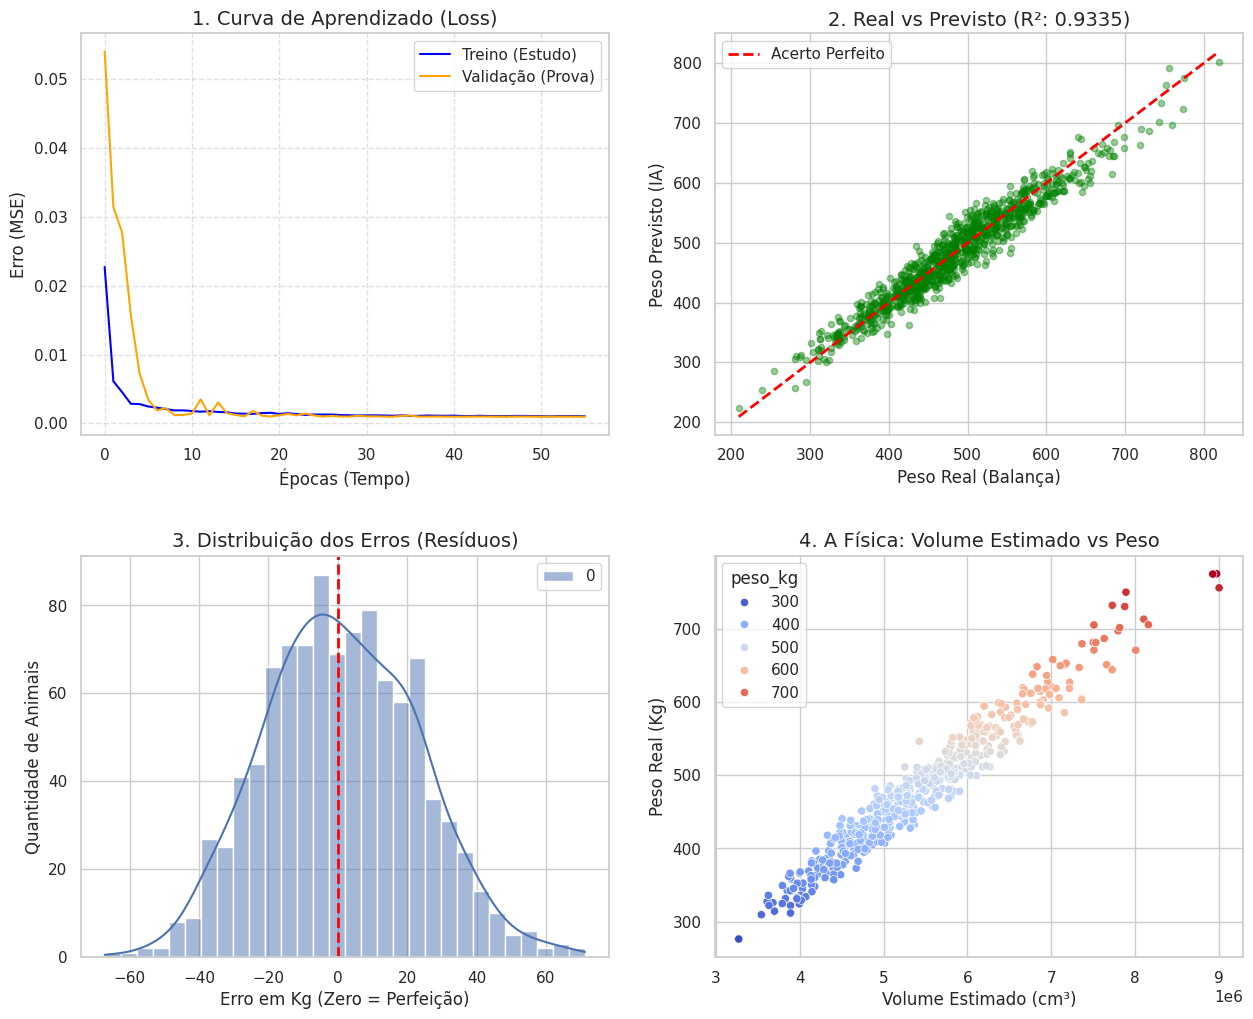

In [29]:
# --- PASSO 5: DASHBOARD VISUAL DE PERFORMANCE ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

print(">>> GERANDO RELATÓRIOS GRÁFICOS... <<<")

# 1. Preparar os dados (Garantir que estamos usando Kg reais)
# Fazemos a previsão final no conjunto de teste
y_pred_scaled = model.predict(X_test, verbose=0)

# Desfazemos a normalização para voltar para Kg
y_test_real = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)

# Calculamos os erros (Resíduos)
residuos = y_test_real - y_pred_real

# --- CRIAÇÃO DOS GRÁFICOS (GRID 2x2) ---
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# GRÁFICO 1: A Curva de Aprendizado (Loss)
# Mostra se a IA aprendeu ou apenas decorou
axs[0, 0].plot(history.history['loss'], label='Treino (Estudo)', color='blue')
axs[0, 0].plot(history.history['val_loss'], label='Validação (Prova)', color='orange')
axs[0, 0].set_title('1. Curva de Aprendizado (Loss)', fontsize=14)
axs[0, 0].set_xlabel('Épocas (Tempo)')
axs[0, 0].set_ylabel('Erro (MSE)')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# GRÁFICO 2: Realidade vs Previsão
# Mostra a precisão visualmente
axs[0, 1].scatter(y_test_real, y_pred_real, alpha=0.4, color='green', s=20)
# Linha vermelha = Perfeição
min_val = min(y_test_real.min(), y_pred_real.min())
max_val = max(y_test_real.max(), y_pred_real.max())
axs[0, 1].plot([min_val, max_val], [min_val, max_val], color='red', lw=2, linestyle='--', label='Acerto Perfeito')
axs[0, 1].set_title(f'2. Real vs Previsto (R²: {r2_score(y_test_real, y_pred_real):.4f})', fontsize=14)
axs[0, 1].set_xlabel('Peso Real (Balança)')
axs[0, 1].set_ylabel('Peso Previsto (IA)')
axs[0, 1].legend()

# GRÁFICO 3: Distribuição dos Erros (Histograma)
# Mostra se os erros são aleatórios ou viciados
sns.histplot(residuos, kde=True, ax=axs[1, 0], color='purple', bins=30)
axs[1, 0].axvline(0, color='red', linestyle='--', lw=2)
axs[1, 0].set_title('3. Distribuição dos Erros (Resíduos)', fontsize=14)
axs[1, 0].set_xlabel('Erro em Kg (Zero = Perfeição)')
axs[1, 0].set_ylabel('Quantidade de Animais')

# GRÁFICO 4: Correlação das Features (O que a IA usou)
# Vamos pegar uma amostra para não travar o gráfico
subset = df_otimizado.sample(500)
sns.scatterplot(x='volume_estimado', y='peso_kg', data=subset, ax=axs[1, 1], hue='peso_kg', palette='coolwarm')
axs[1, 1].set_title('4. A Física: Volume Estimado vs Peso', fontsize=14)
axs[1, 1].set_xlabel('Volume Estimado (cm³)')
axs[1, 1].set_ylabel('Peso Real (Kg)')

plt.show()

### 📊 Interpretação dos Resultados do Modelo

#### 📉 Gráfico 1: A Curva de Aprendizado (Loss)
* **O que é:** Mostra o erro diminuindo conforme o tempo passa (Épocas).
* **Interpretação para Leigos:** A linha **Azul** é a IA estudando em casa (Treino). A linha **Laranja** é a IA fazendo a prova (Validação).
* **Sinal de Sucesso:** Ambas as linhas descem juntas e encostam no fundo. Se a linha laranja começasse a subir enquanto a azul desce, significaria que a IA está "decorando" (*Overfitting*). No nosso caso, elas descem juntas, indicando um aprendizado saudável.

#### 🎯 Gráfico 2: Real vs. Previsto (Scatter Plot)
* **O que é:** Compara o peso que a balança mostrou (Eixo X) com o que a IA disse (Eixo Y).
* **Interpretação para Leigos:** A **Linha Vermelha** representa a perfeição absoluta. Os **Pontos Verdes** são os palpites da IA.
* **Sinal de Sucesso:** Quanto mais os pontos verdes estiverem "abraçando" a linha vermelha, melhor. Se eles estivessem espalhados como uma nuvem gorda, a IA estaria chutando. Aqui, vemos uma linha fina e agrupada, provando alta precisão ($R^2$ alto).

#### 🔔 Gráfico 3: Distribuição dos Erros (Histograma)
* **O que é:** Mostra *o quanto* a IA errou. O centro é o Zero.
* **Interpretação para Leigos:** A maioria dos erros deve estar no meio (perto do zero). As barras devem formar um "sino" ou "montanha" (Curva de Gauss).
* **Sinal de Sucesso:** O pico da montanha está no zero. Isso significa que, na maioria das vezes, a IA acerta na mosca. As caudas (erros grandes de +/- 40kg) são muito raras. Se a montanha estivesse deslocada para a direita, significaria que a IA tem um "vício" (*bias*) de sempre chutar valores muito altos.

#### 📐 Gráfico 4: A Física (Volume vs Peso)
* **O que é:** Mostra a relação entre a variável que criamos (Volume Estimado) e o Peso.
* **Interpretação para Leigos:** Este gráfico explica *por que* a IA funciona. Ele mostra que existe uma relação física clara: quanto maior o volume corporal, maior o peso.
* **Sinal de Sucesso:** Os pontos formam uma linha quase reta e limpa. Isso prova que a **"Engenharia de Atributos"** (criar a coluna Volume) foi uma ótima ideia, facilitando o trabalho da Rede Neural.